Морозенков О.Н. ИУ5-23М. РК1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [209]:
# возьмем крутейший датасет по раменам и их рейтингам, я люблю рамены
data = pd.read_csv('archive/ramen-ratings.csv')
data

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


In [210]:
data.shape

(2580, 7)

In [211]:
data.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


ЗАДАНИЕ 1
Для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода "one-hot encoding".

In [212]:
data.isnull().sum()

Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          0
Top Ten     2539
dtype: int64

In [213]:
for col in data:
    print(col,len(data[col].unique()))
# Тут видно, что наиболее безболезненно только style можно использовать кодирование(иначе слишком толстая выйдет матрица)    

Review # 2580
Brand 355
Variety 2413
Style 8
Country 38
Stars 51
Top Ten 39


In [226]:
style_one_hot = OneHotEncoder()
style_one_hot = ohe.fit_transform(data[['Style']])
style_one_hot.todense()[0:10]


matrix([[0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.]])

In [215]:
dummy_one_hot=pd.get_dummies(data[['Style']])
dummy_one_hot.head()

,Style_Bar,Style_Bowl,Style_Box,Style_Can,Style_Cup,Style_Pack,Style_Tray
0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0


Можно посмотреть на то, какой тип рамена чаще других присутствует в списке

In [216]:
dummy_one_hot.sum()
# почему-то думал, что рамены чаще всего в чашах подаются, а вот нет!

Style_Bar        1
Style_Bowl     481
Style_Box        6
Style_Can        1
Style_Cup      450
Style_Pack    1531
Style_Tray     108
dtype: int64

ЗАДАНИЕ 2
Для набора данных для одного (произвольного) числового признака проведите обнаружение и удаление выбросов на основе межквартильного размаха.

In [217]:
data.dtypes


Review #     int64
Brand       object
Variety     object
Style       object
Country     object
Stars       object
Top Ten     object
dtype: object

In [218]:
data["Stars"].describe()
# колонка, которая больше других похожа на циферную

count     2580
unique      51
top          4
freq       384
Name: Stars, dtype: object

In [219]:
data["Stars_float"] = (pd.to_numeric(data["Stars"], errors='coerce'))
stars = data["Stars_float"]

data["Stars_float"]
# тут мы получили новую колонку уже с флотами

0       3.75
1       1.00
2       2.25
3       2.75
4       3.75
        ... 
2575    3.50
2576    1.00
2577    2.00
2578    2.00
2579    0.50
Name: Stars_float, Length: 2580, dtype: float64

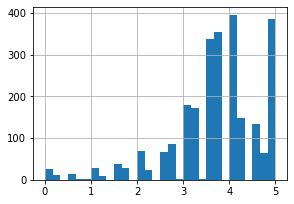

In [220]:
# возьмем часть кода из лекции
def diagnostic_plots(data,col, title):
    # stars.hist(bins=30)
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    data[col].hist(bins=30)
diagnostic_plots(data,"Stars_float","STARS")    

Межквартильный размах IQR (interquartile range, IQR) - это разность третьего квартиля и первого квартиля:



In [221]:
# Функция вычисления верхней и нижней границы выбросов, которая показана в лекции
def get_outlier_boundaries(df, col,k):
    q1= 0.25
    q2= 0.75
    IQR = df[col].quantile(q2) - df[col].quantile(q1)
    print(IQR,(k * IQR))
    print(df[col].quantile(q1))
    print(df[col].quantile(q2))
    lower_boundary = df[col].quantile(q1) - (k * IQR)
    upper_boundary = df[col].quantile(q2) + (k * IQR)
    return lower_boundary, upper_boundary    

In [222]:
lower_boundary, upper_boundary = get_outlier_boundaries(data, "Stars_float",1.5)
print(lower_boundary,upper_boundary)

1.0 1.5
3.25
4.25
1.75 5.75


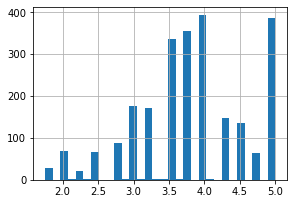

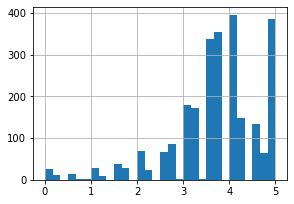

In [223]:
# Флаги для удаления выбросов
outliers_temp = np.where(data["Stars_float"] > upper_boundary, True, np.where(data["Stars_float"] < lower_boundary, True, False))
# Удаление данных на основе флага
data_trimmed = data.loc[~(outliers_temp), ]  
title = 'Поле-{}, метод-{}, строк-{}'.format("Stars_float", "IQR", data_trimmed.shape[0])
diagnostic_plots(data_trimmed, "Stars_float", title)
diagnostic_plots(data, "Stars_float", title) # origin


В итоге наш график стал чуть лучше, но нужно признать , что он изначально не походил на нормальное распределение. В нашем графике доминирует значение 5, которое якобы является хвостовым.
Однако, с точки зрения доминации пятерки, 0 и 1 - являются выбросами, и были устранены при использовании подхода IQR
Отметим, что если такое доминирование пятерки нам нужно проигнорировать(посчитаь выбросом), то можем очень сильно занизить коэффициент, например, до 0.5

In [ ]:
ЗАДАНИЕ ПО ГРУППАМ

Для пары произвольных колонок данных построить график "Диаграмма рассеяния". Берем стиль и оценку в звездах.

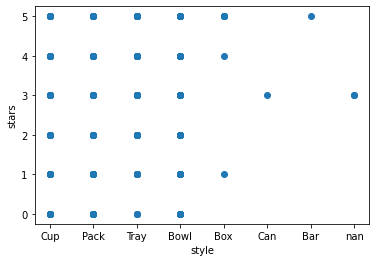

In [224]:
stars=data["Stars_float"].fillna(0.0).apply(int)
plt.xlabel('style')
plt.ylabel('stars')
plt.scatter(x=data['Style'].astype(str), y=stars)
# тут с интами

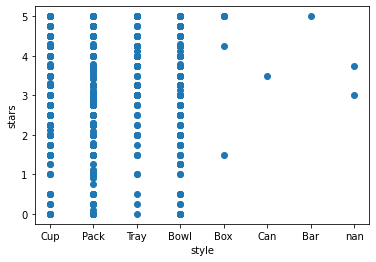

In [225]:
stars=data["Stars_float"].fillna(0.0)
plt.xlabel('style')
plt.ylabel('stars')
plt.scatter(x=data['Style'].astype(str), y=stars)
# тут с флотами